In [3]:
import pandas as pd

df80 = pd.read_csv("df_1980.csv", low_memory=False)
df83 = pd.read_csv("df_1988.csv", low_memory=False)
df88 = pd.read_csv("df_1988.csv", low_memory=False)
df92 = pd.read_csv("df_1992.csv", low_memory=False)
df97 = pd.read_csv("df_1997.csv", low_memory=False)
df00 = pd.read_csv("df_2000.csv", low_memory=False)

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_dataframe(df):
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    
    # Drop specific person columns
    df = df.drop(columns=[col for col in df.columns if 'person_' in col.lower() and any(str(i) in col for i in range(6, 11))])

    # Define possible NaN values
    possible_nan = [
        "DK", "INAP", "REF", "97", "997", "9997", "99997", "999997",
        "97.0", "997.0", "9997.0", "99997.0", "999997.0",
        97.0, 997.0, 9997.0, 99997.0, 999997.0
    ]
    
    # Replace possible NaN values with None
    df.replace(to_replace=possible_nan, value=None, inplace=True)

    # Convert columns to float where possible
    for col in df.columns:
        df[col] = df[col].astype(np.float32, errors="ignore")

    # Check and replace specific values with NaN
    for col in df.columns:
        is_nan = set(df[col].values).intersection(set(possible_nan))
        if is_nan:
            df[col] = df[col].replace(to_replace=is_nan, value=None)

    # Convert columns to float where possible again after NaN replacement
    for col in df.columns:
        df[col] = df[col].astype(np.float32, errors="ignore")

    # Encode only categorical columns that do not contain year or numeric information
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        if not any(char.isdigit() for char in col):  # Skip columns with years or numbers
            df[col] = label_encoder.fit_transform(df[col].astype(str))
    
    return df


# encoders = dict()
# object_cols = tmp_df.select_dtypes(include='object').columns
# for col_name in object_cols:
#     sereies = tmp_df[col_name]
#     label_encoder = LabelEncoder()
#     tmp_df[col_name] = pd.Series(
#         lable_encoder.fit_transform(series[series.notnull()]),
#         index=Series[series.notnull()].index
        
#     )
#     encoders[col_name] = label_encoder
    
    
# Now apply this function to each DataFrame
df80 = preprocess_dataframe(pd.read_csv("df_1980.csv", low_memory=False))
df83 = preprocess_dataframe(pd.read_csv("df_1983.csv", low_memory=False))
df88 = preprocess_dataframe(pd.read_csv("df_1988.csv", low_memory=False))
df92 = preprocess_dataframe(pd.read_csv("df_1992.csv", low_memory=False))
df97 = preprocess_dataframe(pd.read_csv("df_1997.csv", low_memory=False))
df00 = preprocess_dataframe(pd.read_csv("df_2000.csv", low_memory=False))


In [322]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_dataframe(df):
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    
    # Drop specific person columns
    df = df.drop(columns=[col for col in df.columns if 'person_' in col.lower() and any(str(i) in col for i in range(6, 11))])

    # Define possible NaN values
    possible_nan = [
        "DK", "INAP", "REF", "97", "997", "9997", "99997", "999997",
        "97.0", "997.0", "9997.0", "99997.0", "999997.0",
        97.0, 997.0, 9997.0, 99997.0, 999997.0
    ]
    
    # Replace possible NaN values with None
    df.replace(to_replace=possible_nan, value=None, inplace=True)

    # Convert columns to float where possible
    for col in df.columns:
        df[col] = df[col].astype(np.float32, errors="ignore")

    # Check and replace specific values with NaN
    for col in df.columns:
        is_nan = set(df[col].values).intersection(set(possible_nan))
        if is_nan:
            df[col] = df[col].replace(to_replace=is_nan, value=None)

    # Convert columns to float where possible again after NaN replacement
    for col in df.columns:
        df[col] = df[col].astype(np.float32, errors="ignore")

    # Encode only categorical columns that do not contain year or numeric information
    encoders = dict()
    object_cols = df.select_dtypes(include='object').columns
    for col_name in object_cols:
        series = df[col_name]
        label_encoder = LabelEncoder()
        
        # Only fit_transform on non-null values
        df[col_name] = pd.Series(
            label_encoder.fit_transform(series[series.notnull()]),
            index=series[series.notnull()].index
        )
        
        # Store the encoder for future use
        encoders[col_name] = label_encoder
    
    return df  # Return both the processed dataframe and the encoders


df80 = preprocess_dataframe(pd.read_csv("df_1980.csv", low_memory=False))
df83 = preprocess_dataframe(pd.read_csv("df_1983.csv", low_memory=False))
df88 = preprocess_dataframe(pd.read_csv("df_1988.csv", low_memory=False))
df92 = preprocess_dataframe(pd.read_csv("df_1992.csv", low_memory=False))
df97 = preprocess_dataframe(pd.read_csv("df_1997.csv", low_memory=False))
df00 = preprocess_dataframe(pd.read_csv("df_2000.csv", low_memory=False))


In [123]:
print([col for col in df80.columns if 'marital_instability' in col.lower()])
print([col for col in df83.columns if 'marital_instability' in col.lower()])
print([col for col in df88.columns if 'marital_instability' in col.lower()])
print([col for col in df92.columns if 'marital_instability' in col.lower()])
print([col for col in df97.columns if 'marital_instability' in col.lower()])
print([col for col in df00.columns if 'marital_instability' in col.lower()])

['marital_instability_1980', 'index_of_marital_instability']
['marital_instability_index_for_1983', 'marital_instability_1983']
['marital_instability_in_1988']
[]
['marital_instability_1997']
['marital_instability_index_for_2000', 'marital_instability_2000']


In [102]:
df_origin92 = pd.read_csv('df_1992.csv', low_memory=False)
[col for col in df_origin92.columns if 'marital' in col.lower()]

['marital_status_of_respondent',
 'marital_status_of_person_2',
 'marital_status_of_person_3',
 'marital_status_of_person_4',
 'marital_status_of_person_5',
 'marital_status_of_person_6',
 'marital_status_of_person_7',
 'marital_status_of_person_8',
 'marital_status_of_person_9',
 'marital_status_of_person_10',
 'previous_marital_status_correct?',
 'correct_marital_status',
 'exctmnt_vs_security_in_marital_partner',
 'overall_marital_happiness',
 'talked_to_others_about_marital_problem',
 'i_am_responsible_for_marital_problem',
 'marital_happiness_caused_by_own_doing',
 'sat_w/_spouse_fufill_marital_resp',
 'marital_bond_-_financial_security',
 'marital_bond_-_financial_assets',
 "marital_bond_-_children's_welfare",
 'marital_bond_-_not_wanting_to_leave_home',
 "marital_bond_-_spouse's_dependency_on_r",
 "marital_bond_-_r's_dependency_on_spouse",
 'marital_bond_-_religious_beliefs',
 'marital_bond_-_children_would_suffer',
 'marital_bond_-_children_would_disapprove',
 'marital_bond_-_m

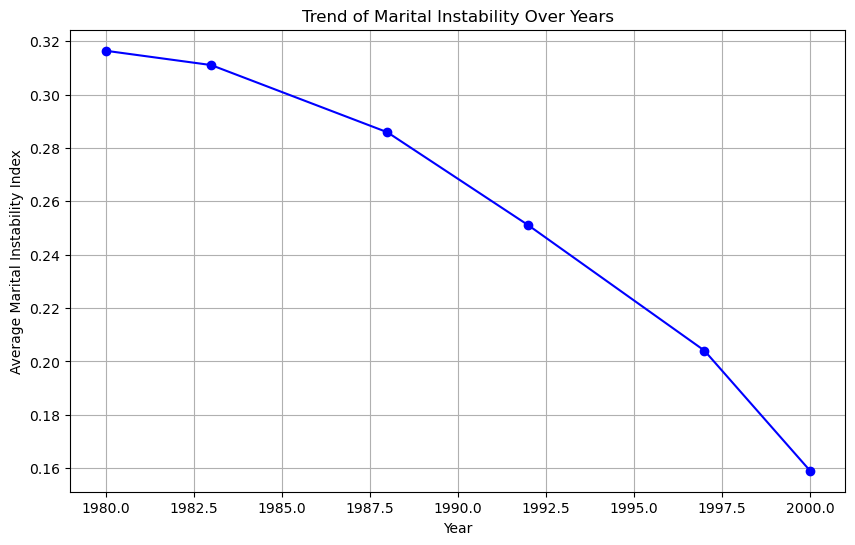

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# List of years and corresponding file paths (adjust paths accordingly)
years = [1980, 1983, 1988, 1992, 1997, 2000]
dataframes = []

# Load and integrate each file
for year in years:
    df = pd.read_csv(f'df_{year}.csv', low_memory=False)  # Use actual paths to each file
    
    # Rename the year-specific column to a common name 'marital_instability'
    target_col = f'marital_instability_{year}'
    if target_col in df.columns:
        df = df.rename(columns={target_col: 'marital_instability'})
    elif year == 1992 and 'marital_stability_1992' in df.columns:
        df = df.rename(columns={'marital_stability_1992': 'marital_instability'})
    elif year == 1988 and 'marital_instability_in_1988' in df.columns:
        df = df.rename(columns={'marital_instability_in_1988': 'marital_instability'})
    else:
        print(f"Warning: {target_col} not found in df_{year}")
        continue
    
    # Add year column to the DataFrame
    df['Year'] = year
    dataframes.append(df[['Year', 'marital_instability']])

# Concatenate all dataframes into a single DataFrame
df_all_years = pd.concat(dataframes, ignore_index=True)

df_all_years = df_all_years.dropna(subset=['marital_instability'])

# Calculate the mean marital instability for each year
yearly_trend = df_all_years.groupby('Year')['marital_instability'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Marital Instability Over Years')
plt.xlabel('Year')
plt.ylabel('Average Marital Instability Index')
plt.grid(True)
plt.show()


In [127]:
print([col for col in df80.columns if 'marital_instability' in col.lower()])
print([col for col in df83.columns if 'marital_instability' in col.lower()])
print([col for col in df88.columns if 'marital_instability' in col.lower()])
print([col for col in df92.columns if 'marital_instability' in col.lower()])
print([col for col in df97.columns if 'marital_instability' in col.lower()])
print([col for col in df00.columns if 'marital_instability' in col.lower()])

['marital_instability_1980', 'index_of_marital_instability']
['marital_instability_index_for_1983', 'marital_instability_1983']
['marital_instability_in_1988']
[]
['marital_instability_1997']
['marital_instability_index_for_2000', 'marital_instability_2000']


In [147]:
[col for col in df88.columns if 'marital_instability_in_1988' in col.lower()]

['marital_instability_in_1988']

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the satisfaction columns by year
satisfaction_columns_by_year = {
    1980: [
        'satisfaction:extent_of_s_understanding?', 'satisfaction:amt_love,affection_received',
        'satisfaction:agreement_with_spouse', 'satisfaction:sexual_relationship',
        'satisfaction:getting_along_with_children', 'satisfaction:s_as_breadwinner',
        'satisfaction:s_takes_care_of_home', 'satisfaction:s_as_someone_to_do_things',
        "satisfaction:s's_faithfullness", 'satisfaction:financial_situation', 
        'satisfaction:with_home'
    ],
    1983: [
        'satisfaction:_extent_of_understanding', 'satisfaction:_amount_of_love_received',
        'satisfaction:_agreement_w/_spouse', 'satisfaction:_sexual_relationship',
        'satisfaction:_getting_along_w/_chldrn', 'satisfaction:_spouse_as_breadwinner',
        "satisfaction:_spouse's_household_work", 'satisfaction:_activities_w/_spouse',
        "satisfaction:_spouse's_faithfulness", 'satisfaction:_financial_situation', 
        'satisfaction:_w/_home'
    ],
    1988: [
        'satisfaction:_extent_of_understanding', 'satisfaction:_amount_of_love_received',
        'satisfaction:_agreement_w/_spouse', 'satisfaction:_sexual_relationship',
        'satisfaction:_getting_along_w/_chldrn', 'satisfaction:_spouse_as_breadwinner',
        "satisfaction:_spouse's_household_work", 'satisfaction:_activities_w/_spouse',
        "satisfaction:_spouse's_faithfulness", 'satisfaction:_financial_situation', 
        'satisfaction:_w/_home'
    ],
    1992: [
        'satisfaction:_extent_of_understanding', 'satisfaction:_amount_of_love_received',
        'satisfaction:_agreement_w/_spouse', 'satisfaction:_sexual_relationship',
        'satisfaction:_getting_along_w/_chldrn', 'satisfaction:_spouse_as_breadwinner',
        "satisfaction:_spouse's_household_work", 'satisfaction:_activities_w/_spouse',
        "satisfaction:_spouse's_faithfulness", 'satisfaction:_financial_situation', 
        'satisfaction:_w/_home'
    ],
    1997: [
        'satisfaction:_understanding', 'satisfaction:_amount_of_love_received',
        'satisfaction:_agreement_w/_spouse', 'satisfaction:_getting_along_w/_children',
        'satisfaction:_spouse_as_breadwinner', "satisfaction:_spouse's_household_work",
        'satisfaction:_activities_w/_spouse', "satisfaction:_spouse's_faithfulness",
        'satisfaction:_financial_situation', 'satisfaction:_with_home'
    ],
    2000: [
        'satisfaction:_understanding', 'satisfaction:_amount_of_love_received',
        'satisfaction:_agreement_w/_spouse', 'satisfaction:_spouses_household_work',
        'satisfaction:_activities_w/_spouse', 'satisfaction:_spouses_faithfulness'
    ]
}

# Initialize an empty DataFrame to hold all the data
combined_data = pd.DataFrame()

# Load and process data for each year
for year, columns in satisfaction_columns_by_year.items():
    # Load the data
    file_path = f'df_{year}.csv'  # Adjust the path as needed
    try:
        data = pd.read_csv(file_path)

        # Clean the data: replace specific values with None and convert columns to float
        data[columns] = data[columns].replace({'?': None}).astype(float)

        # Rename columns to a common name for marital instability
        data.rename(columns={columns[0]: 'marital_instability'}, inplace=True)

        # Drop rows with null values in 'marital_instability' or satisfaction columns
        data.dropna(subset=['marital_instability'] + columns, inplace=True)

        # Append to the combined DataFrame
        combined_data = pd.concat([combined_data, data], ignore_index=True)

    except Exception as e:
        print(f"Error processing {year}: {e}")

# Calculate correlation for satisfaction columns
correlation_results = combined_data[satisfaction_columns_by_year[1980]].corr()

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.plot(correlation_results.index, correlation_results.mean(axis=1), marker='o')
plt.title('Average Correlation of Satisfaction Over Years')
plt.xlabel('Satisfaction Variables')
plt.ylabel('Average Correlation')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\pumad\AppData\Local\Temp\ipykernel_40896\2645991512.py:60: DtypeWarning: Columns (77,113,127,546) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\pumad\AppData\Local\Temp\ipykernel_40896\2645991512.py:60: DtypeWarning: Columns (4,8,14,20,22,28,40,45,48,49,98,121,129,223,225,231,234,235) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Error processing 1980: could not convert string to float: 'NOT TOO HAPPY'
Error processing 1983: "None of [Index(['satisfaction:_extent_of_understanding',\n       'satisfaction:_amount_of_love_received',\n       'satisfaction:_agreement_w/_spouse',\n       'satisfaction:_sexual_relationship',\n       'satisfaction:_getting_along_w/_chldrn',\n       'satisfaction:_spouse_as_breadwinner',\n       'satisfaction:_spouse's_household_work',\n       'satisfaction:_activities_w/_spouse',\n       'satisfaction:_spouse's_faithfulness',\n       'satisfaction:_financial_situation', 'satisfaction:_w/_home'],\n      dtype='object')] are in the [columns]"
Error processing 1988: could not convert string to float: 'PRETTY HAPPY'


C:\Users\pumad\AppData\Local\Temp\ipykernel_40896\2645991512.py:60: DtypeWarning: Columns (9,26,37,39,60,138,149,151,164,254,256,263,266,267,290,412) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\pumad\AppData\Local\Temp\ipykernel_40896\2645991512.py:60: DtypeWarning: Columns (14,55,61,72,79,80,83,89,94,105,126,175,180,249,269,271,274,281,346,350,423) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\pumad\AppData\Local\Temp\ipykernel_40896\2645991512.py:60: DtypeWarning: Columns (3,7,20,25,27,39,44,51,55,56,58,59,64,66,67,68,69,71,72,76,78,79,80,82,83,89,90,91,93,94,100,101,102,104,105,119,120,121,125,142,147,152,165,170,175,177,178,261,262,268,271,275,281,299,300,301,304,321,327,353,358,368,455,457,458,460,464,473,475,476,478,482,491,493,494,496,500,509,511,512,514,518,527,529,530,532,536,545,547,548,550,554,563,565,566,568,572,581,583,584,586,590,599,

Error processing 1992: could not convert string to float: 'VERY HAPPY'
Error processing 1997: could not convert string to float: 'Pretty happy'
Error processing 2000: could not convert string to float: 'Pretty happy'


KeyError: "None of [Index(['satisfaction:extent_of_s_understanding?',\n       'satisfaction:amt_love,affection_received',\n       'satisfaction:agreement_with_spouse',\n       'satisfaction:sexual_relationship',\n       'satisfaction:getting_along_with_children',\n       'satisfaction:s_as_breadwinner', 'satisfaction:s_takes_care_of_home',\n       'satisfaction:s_as_someone_to_do_things',\n       'satisfaction:s's_faithfullness', 'satisfaction:financial_situation',\n       'satisfaction:with_home'],\n      dtype='object')] are in the [columns]"

In [195]:
common_columns

{'satisfaction_agreement_with_spouse',
 'satisfaction_financial_situation',
 'satisfaction_getting_along_with_children',
 'satisfaction_sexual_relationship',
 'satisfaction_with_home'}

In [181]:
print('1980 : ',[col for col in df80.columns if 'satisfaction:' in col.lower()])
print('1983 : ',[col for col in df83.columns if 'satisfaction:' in col.lower()])
print('1988 : ',[col for col in df88.columns if 'satisfaction:' in col.lower()])
print('1992 : ',[col for col in df92.columns if 'satisfaction:' in col.lower()])
print('1997 : ',[col for col in df97.columns if 'satisfaction:' in col.lower()])
print('2000 : ',[col for col in df00.columns if 'satisfaction:' in col.lower()])

1980 :  ['satisfaction:extent_of_s_understanding?', 'satisfaction:amt_love,affection_received', 'satisfaction:agreement_with_spouse', 'satisfaction:sexual_relationship', 'satisfaction:getting_along_with_children', 'satisfaction:s_as_breadwinner', 'satisfaction:s_takes_care_of_home', 'satisfaction:s_as_someone_to_do_things', "satisfaction:s's_faithfullness", 'satisfaction:financial_situation', 'satisfaction:with_home']
1983 :  ['satisfaction:_extent_of_understanding', 'satisfaction:_amount_of_love_received', 'satisfaction:_agreement_w/_spouse', 'satisfaction:_sexual_relationship', 'satisfaction:_getting_along_w/_chldrn', 'satisfaction:_spouse_as_breadwinner', "satisfaction:_spouse's_household_work", 'satisfaction:_activities_w/_spouse', "satisfaction:_spouse's_faithfulness", 'satisfaction:_financial_situation', 'satisfaction:_w/_home']
1988 :  ['satisfaction:_extent_of_understanding', 'satisfaction:_amount_of_love_received', 'satisfaction:_agreement_w/_spouse', 'satisfaction:_sexual_rel

In [330]:
sat80 = [col for col in df80.columns if 'satisfaction:' in col.lower()]
print('Year 1980\n', df80[sat80 + ['marital_instability_1980']].corr()['marital_instability_1980'])
print()

sat83 = [col for col in df83.columns if 'satisfaction-' in col.lower()]
print('Year 1983\n', df83[sat83 + ['marital_instability_1983']].corr()['marital_instability_1983'])
print()

sat88 = [col for col in df88.columns if 'satisfaction:' in col.lower()]
print('Year 1988\n', df88[sat88 + ['marital_instability_in_1988']].corr()['marital_instability_in_1988'])
print()

sat92 = [col for col in df92.columns if 'satisfaction:' in col.lower()]
print('Year 1992\n', df92[sat92 + ['marital_stability_1992']].corr()['marital_stability_1992'])
print()

sat97 = [col for col in df97.columns if 'satisfaction:' in col.lower()]
print('Year 1997\n', df97[sat97 + ['marital_instability_1997']].corr()['marital_instability_1997'])
print()

sat00 = [col for col in df00.columns if 'satisfaction:' in col.lower()]
print('Year 2000\n', df00[sat00 + ['marital_instability_2000']].corr()['marital_instability_2000'])
print()

Year 1980
 satisfaction:extent_of_s_understanding?    -0.458057
satisfaction:amt_love,affection_received   -0.453280
satisfaction:agreement_with_spouse         -0.434775
satisfaction:sexual_relationship           -0.365401
satisfaction:getting_along_with_children   -0.288562
satisfaction:s_as_breadwinner               0.003967
satisfaction:s_takes_care_of_home          -0.285171
satisfaction:s_as_someone_to_do_things     -0.393308
satisfaction:s's_faithfullness             -0.277457
satisfaction:financial_situation           -0.233319
satisfaction:with_home                     -0.244109
marital_instability_1980                    1.000000
Name: marital_instability_1980, dtype: float64

Year 1983
 satisfaction-extent_of_understanding    -0.474066
satisfaction-amount_of_love_received    -0.430502
satisfaction-agreement_with_spouse      -0.457381
satisfaction-sexual_relationship        -0.410173
satisfaction-getting_along_with_child   -0.311871
satisfaction-spouse_as_breadwinner      -0.2

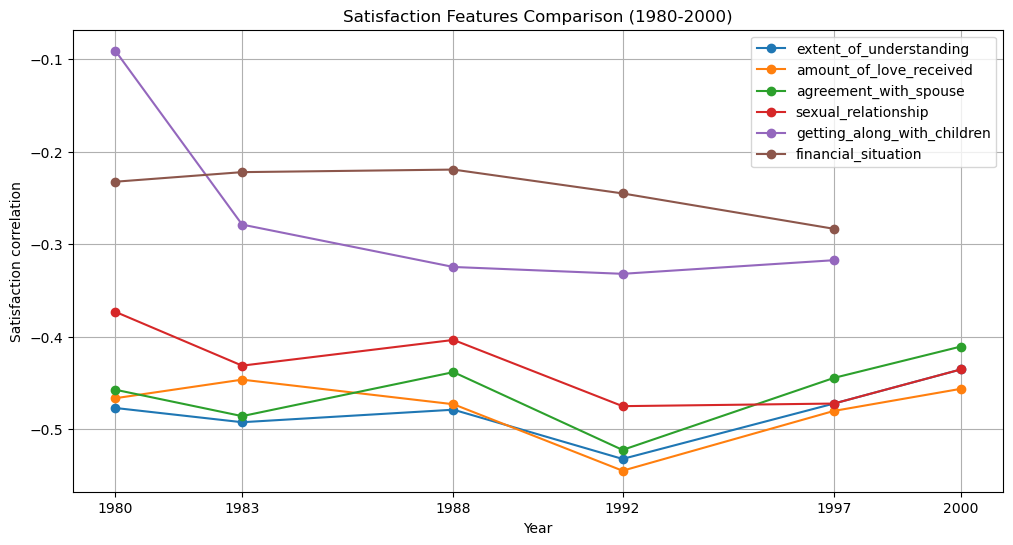

In [332]:
import matplotlib.pyplot as plt

# Satisfaction values for each year
satisfaction_data = {
    "extent_of_understanding": [
        -0.477289,  # 1980
        -0.492695,  # 1983
        -0.479156,  # 1988
        -0.532426,  # 1992
        -0.472509,  # 1997
        -0.435624   # 2000
    ],
    "amount_of_love_received": [
        -0.466740,  # 1980
        -0.446637,  # 1983
        -0.473251,  # 1988
        -0.545172,  # 1992
        -0.480470,  # 1997
        -0.456576   # 2000
    ],
    "agreement_with_spouse": [
        -0.457533,  # 1980
        -0.486111,  # 1983
        -0.438504,  # 1988
        -0.522692,  # 1992
        -0.444765,  # 1997
        -0.410843   # 2000
    ],
    "sexual_relationship": [
        -0.373243,  # 1980
        -0.431496,  # 1983
        -0.403670,  # 1988
        -0.475316,  # 1992
        -0.472509,  # 1997
        -0.435624   # 2000
    ],
    "getting_along_with_children": [
        -0.090793,  # 1980
        -0.278888,  # 1983
        -0.324753,  # 1988
        -0.332153,  # 1992
        -0.317424,  # 1997
        None        # 2000 - Not available
    ],
    "financial_situation": [
        -0.232511,  # 1980
        -0.222143,  # 1983
        -0.219379,  # 1988
        -0.245171,  # 1992
        -0.283458,  # 1997
        None        # 2000 - Not available
    ],
}

years = [1980, 1983, 1988, 1992, 1997, 2000]

# Plotting
plt.figure(figsize=(12, 6))
for feature, values in satisfaction_data.items():
    plt.plot(years, values, marker='o', label=feature)

plt.title('Satisfaction Features Comparison (1980-2000)')
plt.xlabel('Year')
plt.ylabel('Satisfaction correlation')
plt.xticks(years)
plt.legend()
plt.grid()

plt.savefig('Satisfaction_comparison.png', bbox_inches='tight') 

plt.show()


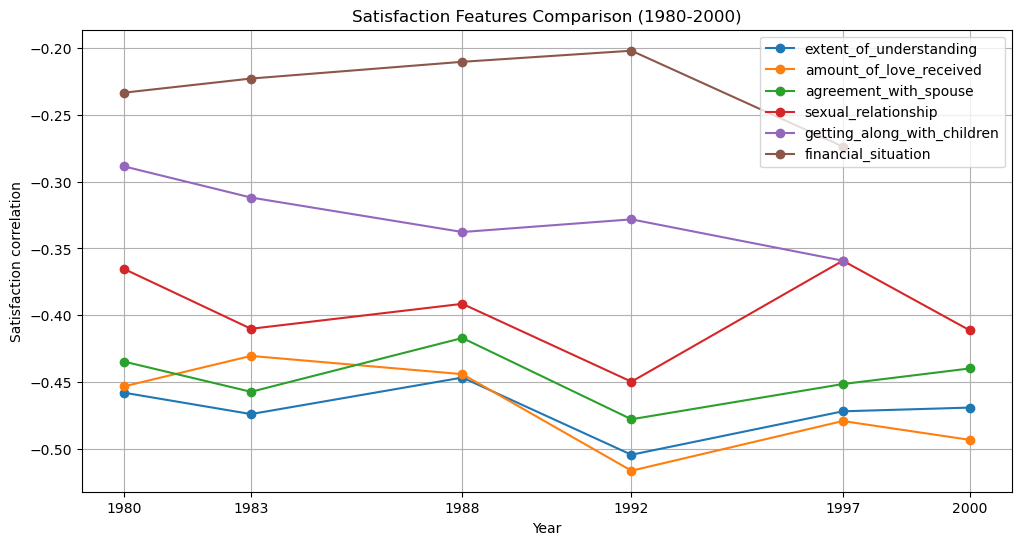

In [338]:
import matplotlib.pyplot as plt

# Updated satisfaction values for each year
satisfaction_data = {
    "extent_of_understanding": [
        -0.458057,  # 1980
        -0.474066,  # 1983
        -0.446711,  # 1988
        -0.504528,  # 1992
        -0.471991,  # 1997
        -0.469204   # 2000
    ],
    "amount_of_love_received": [
        -0.453280,  # 1980
        -0.430502,  # 1983
        -0.444161,  # 1988
        -0.516487,  # 1992
        -0.479268,  # 1997
        -0.493355   # 2000
    ],
    "agreement_with_spouse": [
        -0.434775,  # 1980
        -0.457381,  # 1983
        -0.417083,  # 1988
        -0.477950,  # 1992
        -0.451570,  # 1997
        -0.439905   # 2000
    ],
    "sexual_relationship": [
        -0.365401,  # 1980
        -0.410173,  # 1983
        -0.391489,  # 1988
        -0.449804,  # 1992
        -0.359173,  # 1997
        -0.411278   # 2000
    ],
    "getting_along_with_children": [
        -0.288562,  # 1980
        -0.311871,  # 1983
        -0.337701,  # 1988
        -0.328219,  # 1992
        -0.359173,  # 1997
        None        # 2000 - Not available
    ],
    "financial_situation": [
        -0.233319,  # 1980
        -0.222751,  # 1983
        -0.210215,  # 1988
        -0.201916,  # 1992
        -0.273717,  # 1997
        None        # 2000 - Not available
    ],
}

years = [1980, 1983, 1988, 1992, 1997, 2000]

# Plotting
plt.figure(figsize=(12, 6))
for feature, values in satisfaction_data.items():
    plt.plot(years, values, marker='o', label=feature)

plt.title('Satisfaction Features Comparison (1980-2000)')
plt.xlabel('Year')
plt.ylabel('Satisfaction correlation')
plt.xticks(years)
plt.legend()
plt.grid()

plt.savefig('Satisfaction_comparison_justinlabelencoding.png', bbox_inches='tight') 

plt.show()


In [334]:
sat80 = [col for col in df80.columns if 'marriage_problem:' in col.lower()]
print('Year 1980\n', df80[sat80 + ['marital_instability_1980']].corr()['marital_instability_1980'])
print()

sat83 = [col for col in df83.columns if 'marriage_problem-' in col.lower()]
print('Year 1983\n', df83[sat83 + ['marital_instability_1983']].corr()['marital_instability_1983'])
print()

sat88 = [col for col in df88.columns if 'marriage_problem:' in col.lower()]
print('Year 1988\n', df88[sat88 + ['marital_instability_in_1988']].corr()['marital_instability_in_1988'])
print()

sat92 = [col for col in df92.columns if 'marriage_problem:' in col.lower()]
print('Year 1992\n', df92[sat92 + ['marital_stability_1992']].corr()['marital_stability_1992'])
print()

sat97 = [col for col in df97.columns if 'marriage_problem:' in col.lower()]
print('Year 1997\n', df97[sat97 + ['marital_instability_1997']].corr()['marital_instability_1997'])
print()

sat00 = [col for col in df00.columns if 'marriage_problem:' in col.lower()]
print('Year 2000\n', df00[sat00 + ['marital_instability_2000']].corr()['marital_instability_2000'])
print()

Year 1980
 marriage_problem:get_angry_easily           0.243802
marriage_problem:easily_hurt_feelings       0.172203
marriage_problem:is_jealous                 0.230052
marriage_problem:is_domineering             0.261868
marriage_problem:is_critical                0.208384
marriage_problem:is_moody                   0.205438
marriage_problem:one_not_talking_to_othe    0.224013
marriage_problem:sex_relations_with_othe    0.230669
marriage_problem:has_irritating_habits      0.131817
marriage_problem:one_not_at_home_enough     0.228027
marriage_problem:spends_money_foolishly     0.220653
marriage_problem:drinks,uses_drugs          0.215582
marriage_problem:been_in_trouble_with_la    0.124837
marriage_problem:abusive_to_children        0.179642
marital_instability_1980                    1.000000
Name: marital_instability_1980, dtype: float64

Year 1983
 marriage_problem-gets_angry_easily        0.200513
marriage_problem-easily_hurt              0.185955
marriage_problem-jealousy        

C:\Users\pumad\AppData\Local\Temp\ipykernel_40896\944176161.py:122: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", len(satisfaction_data))


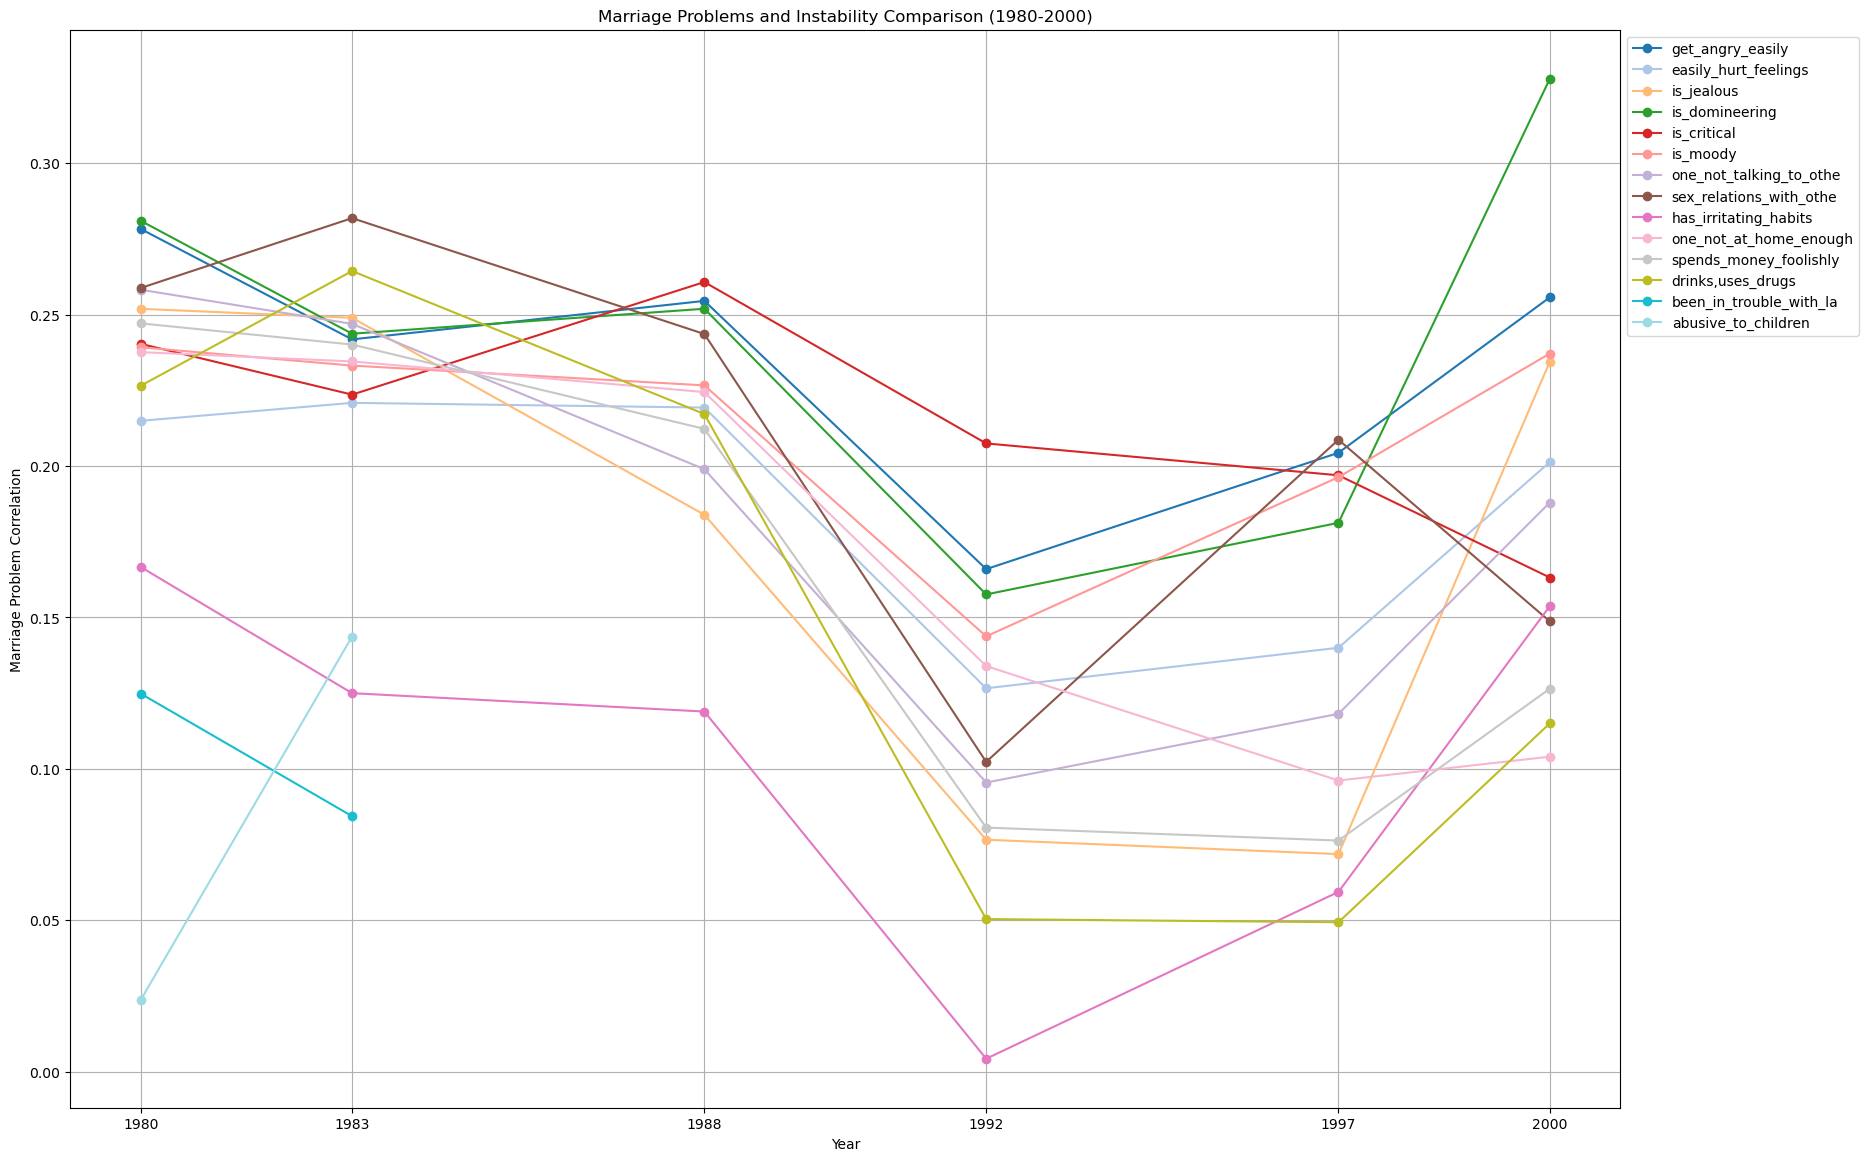

In [336]:
import matplotlib.pyplot as plt

# Satisfaction values for each year based on the new data
satisfaction_data = {
    "get_angry_easily": [
        0.278294,  # 1980
        0.241826,  # 1983
        0.254542,  # 1988
        0.165965,  # 1992
        0.204379,  # 1997
        0.255723   # 2000
    ],
    "easily_hurt_feelings": [
        0.214938,  # 1980
        0.220870,  # 1983
        0.219316,  # 1988
        0.126614,  # 1992
        0.139992,  # 1997
        0.201329   # 2000
    ],
    "is_jealous": [
        0.251920,  # 1980
        0.248952,  # 1983
        0.183921,  # 1988
        0.076602,  # 1992
        0.071855,  # 1997
        0.234503   # 2000
    ],
    "is_domineering": [
        0.280990,  # 1980
        0.243702,  # 1983
        0.251941,  # 1988
        0.157599,  # 1992
        0.181254,  # 1997
        0.327908   # 2000
    ],
    "is_critical": [
        0.240352,  # 1980
        0.223588,  # 1983
        0.260770,  # 1988
        0.207470,  # 1992
        0.196955,  # 1997
        0.163182   # 2000
    ],
    "is_moody": [
        0.239219,  # 1980
        0.233175,  # 1983
        0.226641,  # 1988
        0.143765,  # 1992
        0.196328,  # 1997
        0.237157   # 2000
    ],
    "one_not_talking_to_othe": [
        0.258228,  # 1980
        0.246943,  # 1983
        0.198952,  # 1988
        0.095483,  # 1992
        0.118176,  # 1997
        0.187960   # 2000
    ],
    "sex_relations_with_othe": [
        0.258801,  # 1980
        0.281873,  # 1983
        0.243600,  # 1988
        0.102308,  # 1992
        0.208699,  # 1997
        0.148691   # 2000
    ],
    "has_irritating_habits": [
        0.166659,  # 1980
        0.124995,  # 1983
        0.118928,  # 1988
        0.004282,  # 1992
        0.059376,  # 1997
        0.153736   # 2000
    ],
    "one_not_at_home_enough": [
        0.237621,  # 1980
        0.234544,  # 1983
        0.224427,  # 1988
        0.133964,  # 1992
        0.096151,  # 1997
        0.104029   # 2000
    ],
    "spends_money_foolishly": [
        0.247115,  # 1980
        0.240126,  # 1983
        0.212280,  # 1988
        0.080604,  # 1992
        0.076332,  # 1997
        0.126480   # 2000
    ],
    "drinks,uses_drugs": [
        0.226525,  # 1980
        0.264400,  # 1983
        0.217182,  # 1988
        0.050390,  # 1992
        0.049350,  # 1997
        0.115038   # 2000
    ],
    "been_in_trouble_with_la": [
        0.124837,  # 1980
        0.084367,  # 1983
        None,      # 1988 - Not available
        None,      # 1992 - Not available
        None,      # 1997 - Not available
        None       # 2000 - Not available
    ],
    "abusive_to_children": [
        0.023692,  # 1980
        0.143704,  # 1983
        None,      # 1988 - Not available
        None,      # 1992 - Not available
        None,      # 1997 - Not available
        None       # 2000 - Not available
    ],

}

years = [1980, 1983, 1988, 1992, 1997, 2000]

colors = plt.cm.get_cmap("tab20", len(satisfaction_data))

# Plotting
plt.figure(figsize=(20, 14))
for idx, (feature, values) in enumerate(satisfaction_data.items()):
    plt.plot(years, values, marker='o', label=feature, color=colors(idx))


plt.title('Marriage Problems and Instability Comparison (1980-2000)')
plt.xlabel('Year')
plt.ylabel('Marriage Problem Correlation')
plt.xticks(years)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()



plt.savefig('marriage_problems_comparison.png', bbox_inches='tight')  # Save as PNG, adjust as needed

# Show the plot
plt.show()

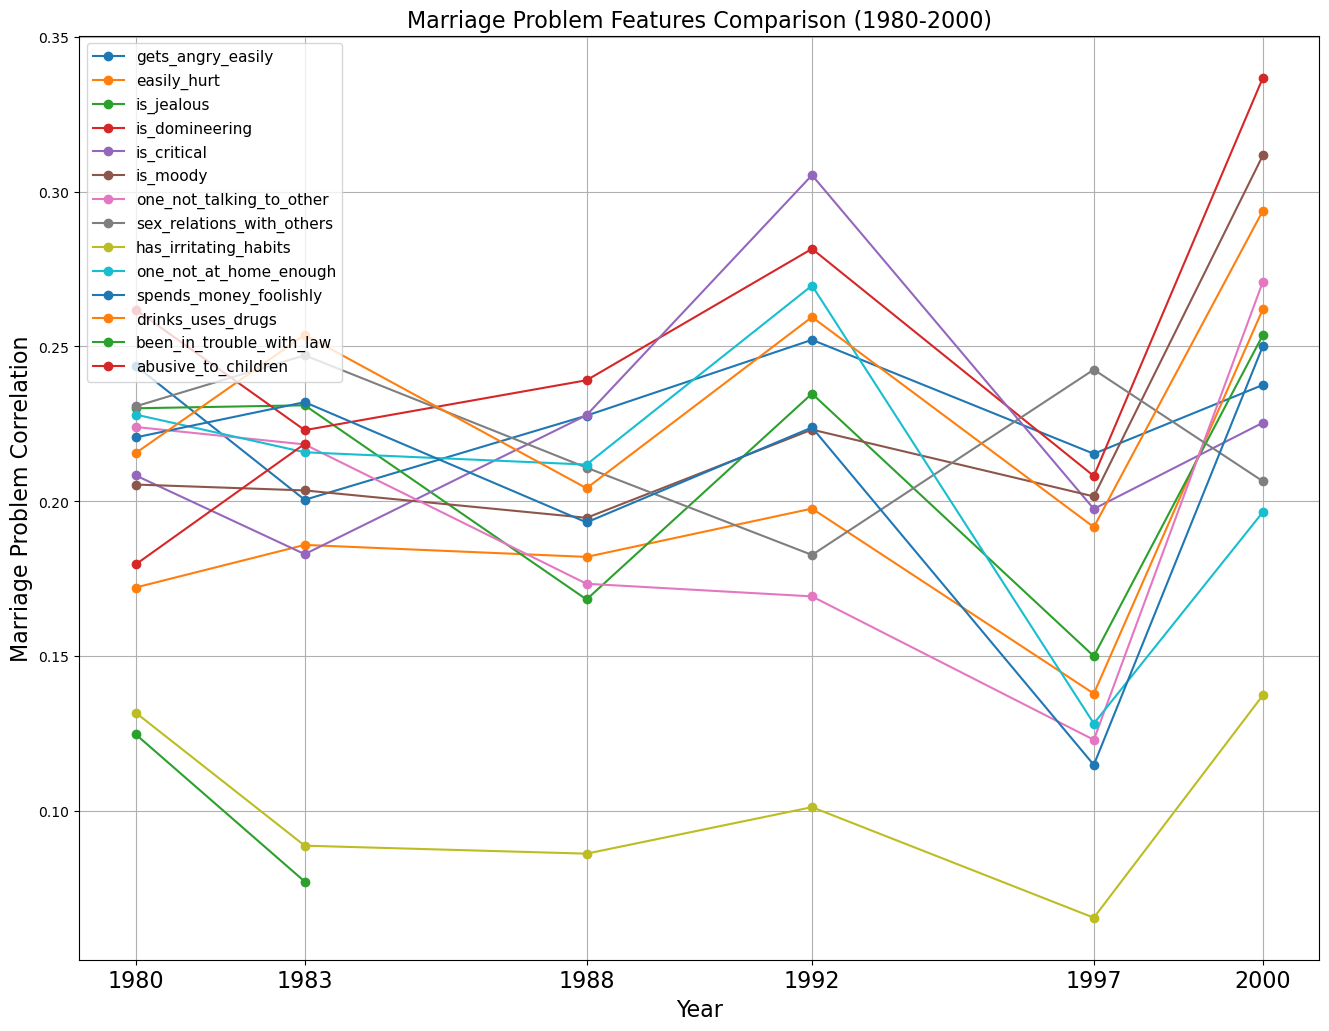

In [397]:
import matplotlib.pyplot as plt

# Updated marriage problem data for each year
marriage_problem_data = {
    "gets_angry_easily": [
        0.243802,  # 1980
        0.200513,  # 1983
        0.227686,  # 1988
        0.252145,  # 1992
        0.215369,  # 1997
        0.237588   # 2000
    ],
    "easily_hurt": [
        0.172203,  # 1980
        0.185955,  # 1983
        0.182083,  # 1988
        0.197671,  # 1992
        0.137959,  # 1997
        0.262079   # 2000
    ],
    "is_jealous": [
        0.230052,  # 1980
        0.231018,  # 1983
        0.168344,  # 1988
        0.234777,  # 1992
        0.150046,  # 1997
        0.253733   # 2000
    ],
    "is_domineering": [
        0.261868,  # 1980
        0.222987,  # 1983
        0.239099,  # 1988
        0.281517,  # 1992
        0.208185,  # 1997
        0.336740   # 2000
    ],
    "is_critical": [
        0.208384,  # 1980
        0.182968,  # 1983
        0.227824,  # 1988
        0.305298,  # 1992
        0.197567,  # 1997
        0.225401   # 2000
    ],
    "is_moody": [
        0.205438,  # 1980
        0.203537,  # 1983
        0.194699,  # 1988
        0.223170,  # 1992
        0.201607,  # 1997
        0.311717   # 2000
    ],
    "one_not_talking_to_other": [
        0.224013,  # 1980
        0.218388,  # 1983
        0.173413,  # 1988
        0.169337,  # 1992
        0.123048,  # 1997
        0.270935   # 2000
    ],
    "sex_relations_with_others": [
        0.230669,  # 1980
        0.247141,  # 1983
        0.210885,  # 1988
        0.182721,  # 1992
        0.242533,  # 1997
        0.206488   # 2000
    ],
    "has_irritating_habits": [
        0.131817,  # 1980
        0.088880,  # 1983
        0.086305,  # 1988
        0.101311,  # 1992
        0.065628,  # 1997
        0.137445   # 2000
    ],
    "one_not_at_home_enough": [
        0.228027,  # 1980
        0.215848,  # 1983
        0.211883,  # 1988
        0.269664,  # 1992
        0.128303,  # 1997
        0.196562   # 2000
    ],
    "spends_money_foolishly": [
        0.220653,  # 1980
        0.232027,  # 1983
        0.193227,  # 1988
        0.223858,  # 1992
        0.114957,  # 1997
        0.250158   # 2000
    ],
    "drinks_uses_drugs": [
        0.215582,  # 1980
        0.253741,  # 1983
        0.204250,  # 1988
        0.259505,  # 1992
        0.191701,  # 1997
        0.293842   # 2000
    ],
    "been_in_trouble_with_law": [
        0.124837,  # 1980
        0.077297,  # 1983
        None,      # 1988 - Not available
        None,      # 1992 - Not available
        None,      # 1997 - Not available
        None       # 2000 - Not available
    ],
    "abusive_to_children": [
        0.179642,  # 1980
        0.218579,  # 1983
        None,      # 1988 - Not available
        None,      # 1992 - Not available
        None,      # 1997 - Not available
        None       # 2000 - Not available
    ],
}

years = [1980, 1983, 1988, 1992, 1997, 2000]

# Plotting
plt.figure(figsize=(16, 12))
for feature, values in marriage_problem_data.items():
    plt.plot(years, values, marker='o', label=feature)

plt.title('Marriage Problem Features Comparison (1980-2000)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Marriage Problem Correlation', fontsize=16)
plt.xticks(years, fontsize=16)
plt.legend(loc='upper left', fontsize=11)
plt.grid()

plt.savefig('Marriage_Problem_Comparison_justinlabelencoding.png', bbox_inches='tight')

plt.show()


In [375]:
dv = [col for col in df97.columns if 'divorce_worries' in col.lower()]

In [379]:

sat00 = [col for col in df00.columns if 'marriage_problem:' in col.lower()]
print('Year 1997\n', df97[dv + ['marital_instability_1997']].corr()['marital_instability_1997'])
print()

Year 1997
 divorce_worries:_financial_security       NaN
divorce_worries:_moving_away              NaN
divorce_worries:_dividing_the_property    NaN
divorce_worries:_spouse's_dependence      NaN
divorce_worries:_r's_dependence           NaN
divorce_worries:_religious_beliefs        NaN
divorce_worries:_children's_welfare       NaN
divorce_worries:_children's_approval      NaN
divorce_worries:_losing_children          NaN
divorce_worries:_family_opinions          NaN
marital_instability_1997                  1.0
Name: marital_instability_1997, dtype: float64

